<a href="https://colab.research.google.com/github/kingslyroche/ipynb/blob/master/Deep_learning_Keras_Titanic_Classification_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# Import necessary keras modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD



In [125]:
df=pd.read_csv('https://assets.datacamp.com/production/repositories/654/datasets/92b75b9bc0c0a8a30999d76f4a1ee786ef072a9c/titanic_all_numeric.csv')
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [0]:

# Creating features and labels

predictors=df.drop(['survived','age_was_missing'],axis=1).as_matrix()

target=to_categorical(df['survived'])

In [0]:

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape=(n_cols,)
# Convert the target to categorical: target
target = to_categorical(df.survived)


In [0]:
#Initialize the callbacks
es=EarlyStopping(monitor='val_loss',patience=2)


In [0]:
def  get_new_model(input_shape=input_shape):

  # Set up the model
  model = Sequential()

  # Add the first layer
  model.add(Dense(150,activation='relu',input_shape=input_shape))
  model.add(Dense(150,activation='relu'))


  # Add the output layer
  model.add(Dense(2,activation='softmax'))

  return (model)


In [140]:
   
lr=[0.0001,0.1]
history=[]

for lr in lr:
  print('\nTesting model with learning rate: %f \n'%lr )
  
  #get a unoptimized model
  
  model = get_new_model()
  
  #create the optimizer
  my_sgd=SGD(lr=lr)
  
  # Compile the model
  model.compile(optimizer=my_sgd,loss='categorical_crossentropy',metrics=['accuracy'])

  # Fit the model
  m=model.fit(predictors,target,epochs=15,validation_split=0.3)

 
  history.append(m.history)



Testing model with learning rate: 0.000100 

Train on 623 samples, validate on 268 samples
Epoch 1/15
623/623 [==============================] - 5s 7ms/step - loss: 0.7646 - acc: 0.4655 - val_loss: 0.7537 - val_acc: 0.5224
Epoch 2/15
623/623 [==============================] - 0s 102us/step - loss: 0.6882 - acc: 0.6067 - val_loss: 0.6946 - val_acc: 0.6119
Epoch 3/15
623/623 [==============================] - 0s 92us/step - loss: 0.6711 - acc: 0.6324 - val_loss: 0.6623 - val_acc: 0.6269
Epoch 4/15
623/623 [==============================] - 0s 93us/step - loss: 0.6601 - acc: 0.6501 - val_loss: 0.6459 - val_acc: 0.6567
Epoch 5/15
623/623 [==============================] - 0s 104us/step - loss: 0.6601 - acc: 0.6356 - val_loss: 0.6418 - val_acc: 0.6530
Epoch 6/15
623/623 [==============================] - 0s 104us/step - loss: 0.6540 - acc: 0.6388 - val_loss: 0.6402 - val_acc: 0.7052
Epoch 7/15
623/623 [==============================] - 0s 98us/step - loss: 0.6539 - acc: 0.6485 - val_loss: 

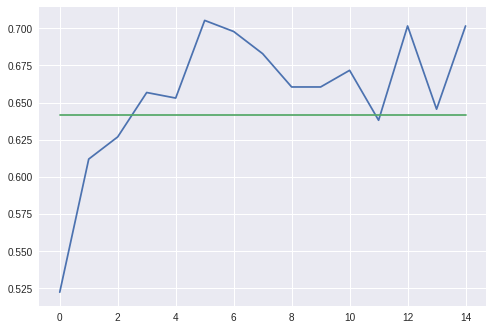

In [141]:
for x in history:
  plt.plot(x['val_acc'])